In [2]:
#load libs
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point

import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
country = geopandas.read_file("gz_2010_us_040_00_500k.json")
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ..."
1,0400000US25,25,Massachusetts,,7800.058,"MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ..."
2,0400000US26,26,Michigan,,56538.901,"MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ..."
3,0400000US30,30,Montana,,145545.801,"POLYGON ((-104.05770 44.99743, -104.25015 44.9..."
4,0400000US32,32,Nevada,,109781.180,"POLYGON ((-114.05060 37.00040, -114.04999 36.9..."


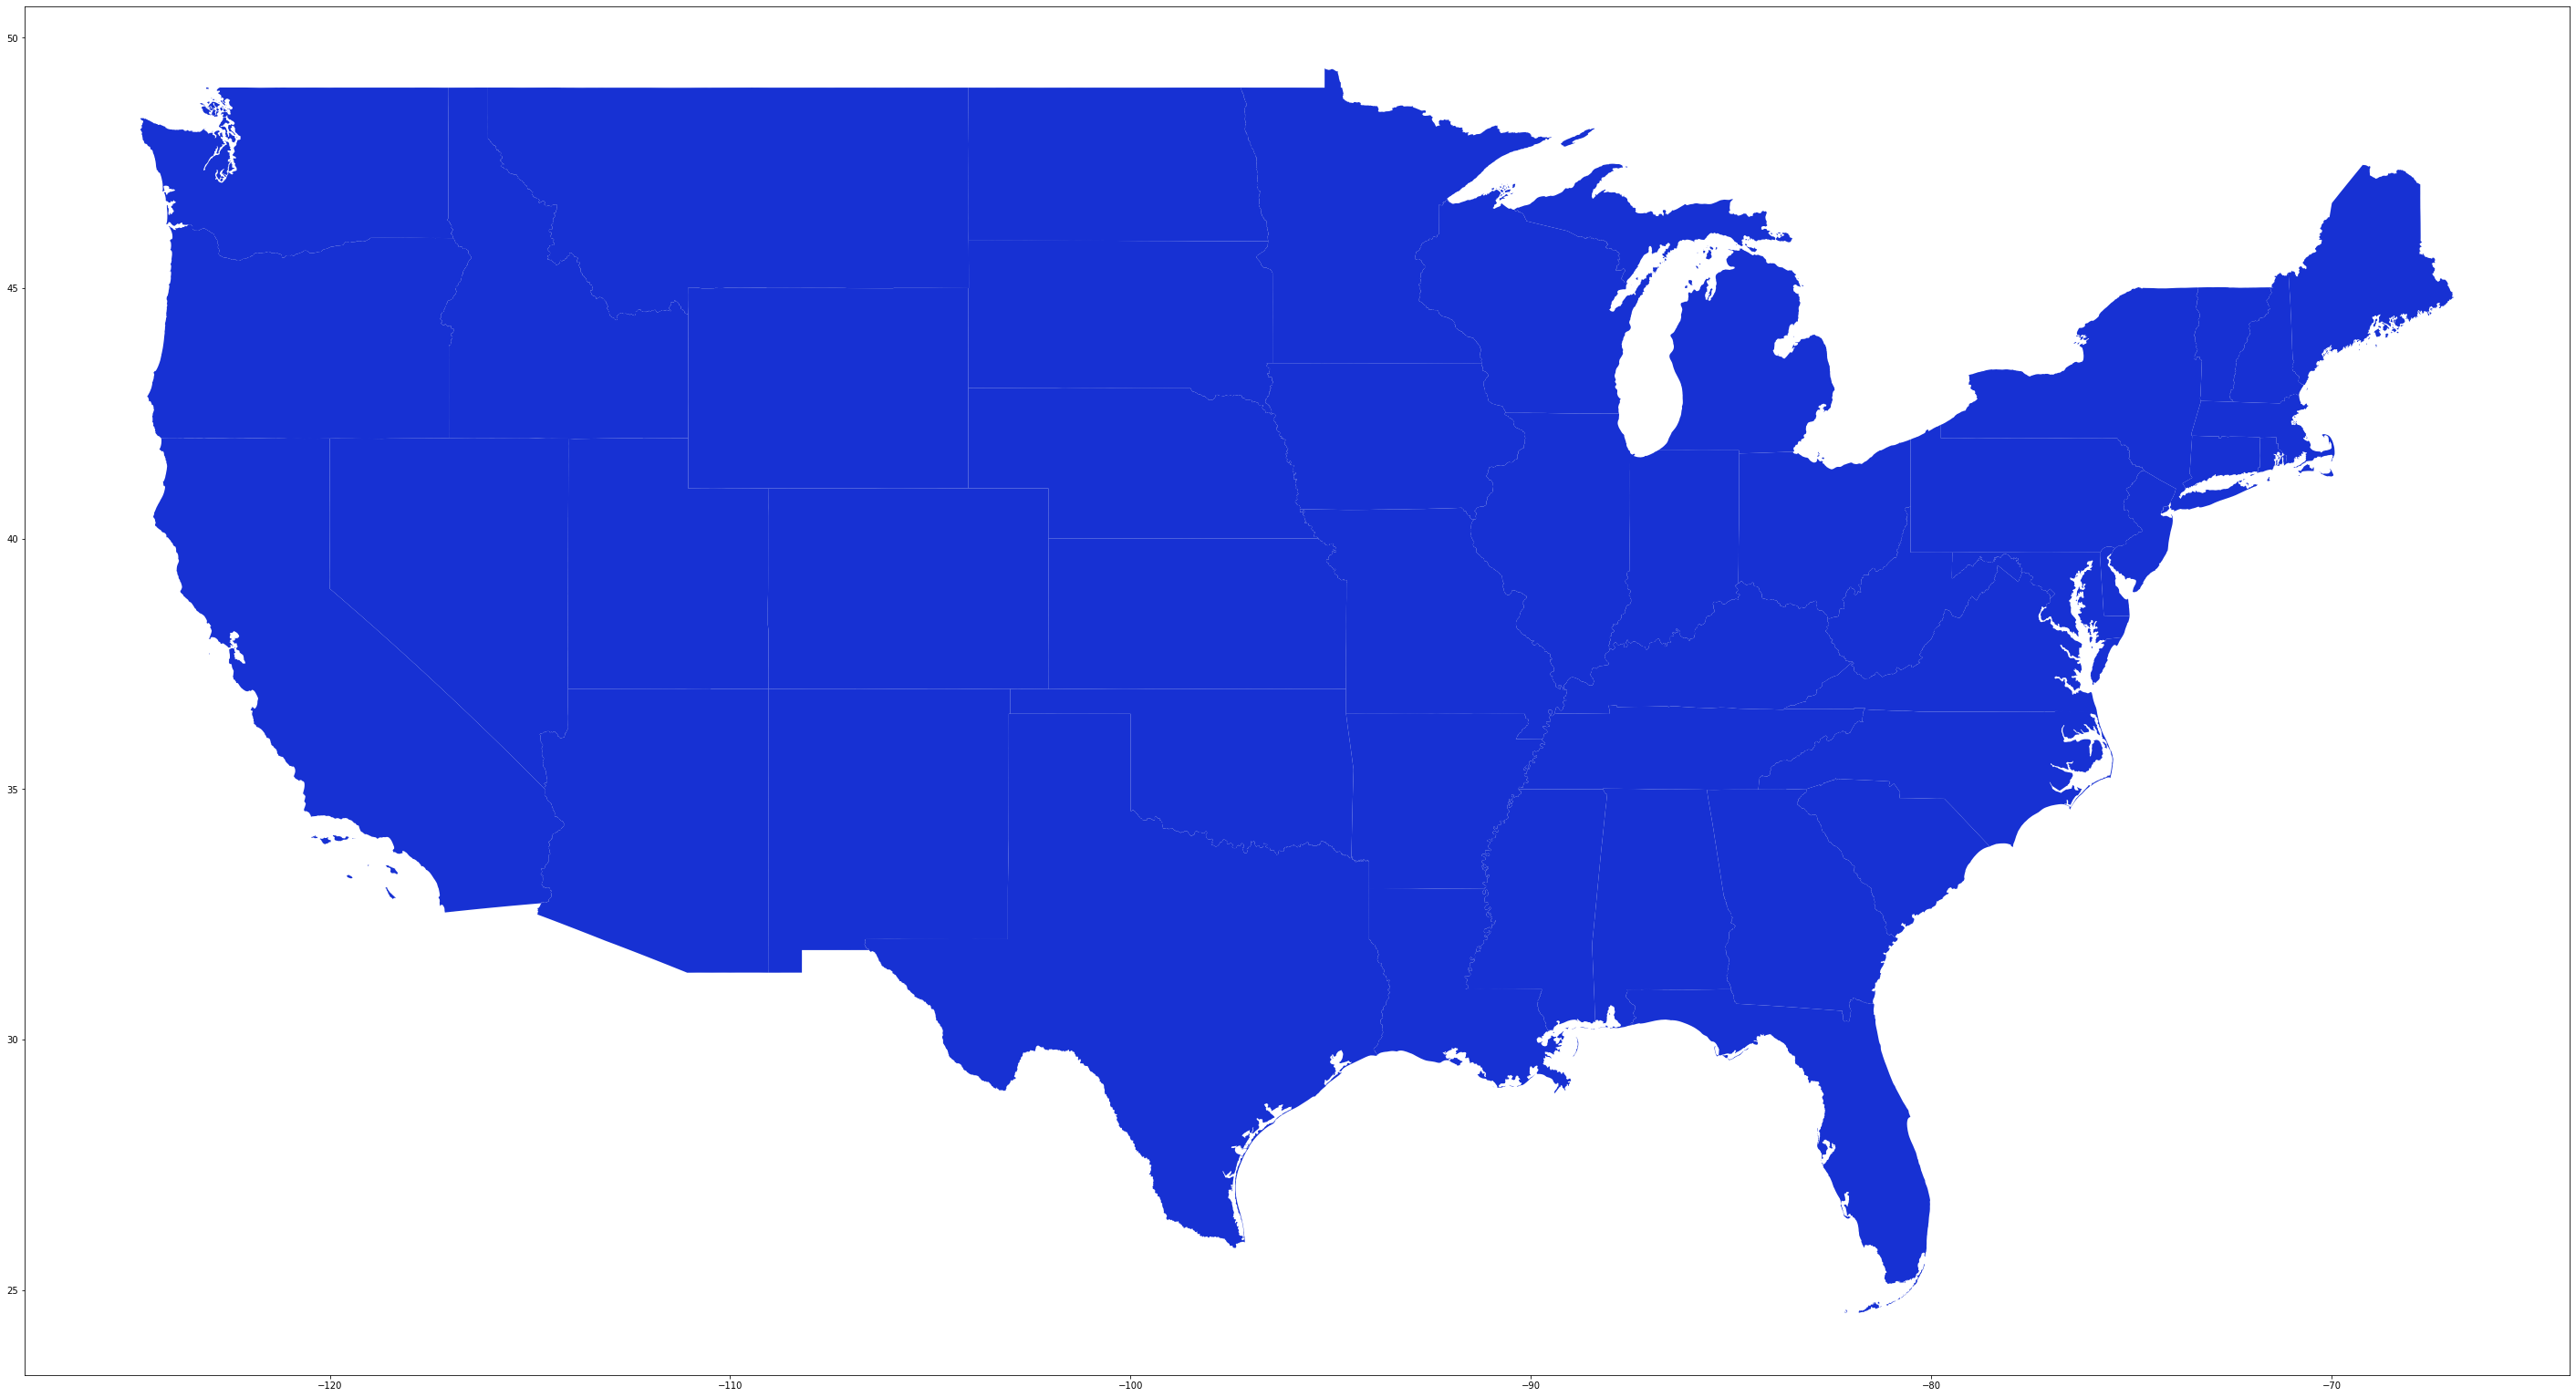

In [6]:
country[country['NAME'].isin(['Alaska','Hawaii','Puerto Rico']) == False].plot(figsize=(50,40), color='#1731D3');

In [7]:
#load harvey data
#Ref URL -> http://flhurricane.com/cyclone/stormhistory.php?storm=9&year=2017
harvey = pd.read_csv('harvey.csv')
harvey.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1A,08/17/2017 14:00,13.1,54.1,35,1007,W at 17 MPH (270 deg),Potential Tropical Cyclone,Nine,08/17/2017 13:53,Beven
1,2,08/17/2017 17:00,13.0,55.8,40,1004,W at 18 MPH (270 deg),Tropical Storm,Harvey,08/17/2017 16:50,Beven
2,2A,08/17/2017 20:00,12.9,56.5,40,1005,W at 18 MPH (270 deg),Tropical Storm,Harvey,08/17/2017 19:53,Pasch
3,3,08/17/2017 23:00,13.0,57.4,40,1005,W at 18 MPH (270 deg),Tropical Storm,Harvey,08/17/2017 22:32,Pasch
4,3A,08/18/2017 02:00,13.0,58.1,40,1005,W at 17 MPH (270 deg),Tropical Storm,Harvey,08/18/2017 01:41,Avila


In [8]:
harvey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AdvisoryNumber  70 non-null     object 
 1   Date            70 non-null     object 
 2   Lat             70 non-null     float64
 3   Long            70 non-null     float64
 4   Wind            70 non-null     int64  
 5   Pres            70 non-null     int64  
 6   Movement        70 non-null     object 
 7   Type            70 non-null     object 
 8   Name            70 non-null     object 
 9   Received        70 non-null     object 
 10  Forecaster      70 non-null     object 
dtypes: float64(2), int64(2), object(7)
memory usage: 6.1+ KB


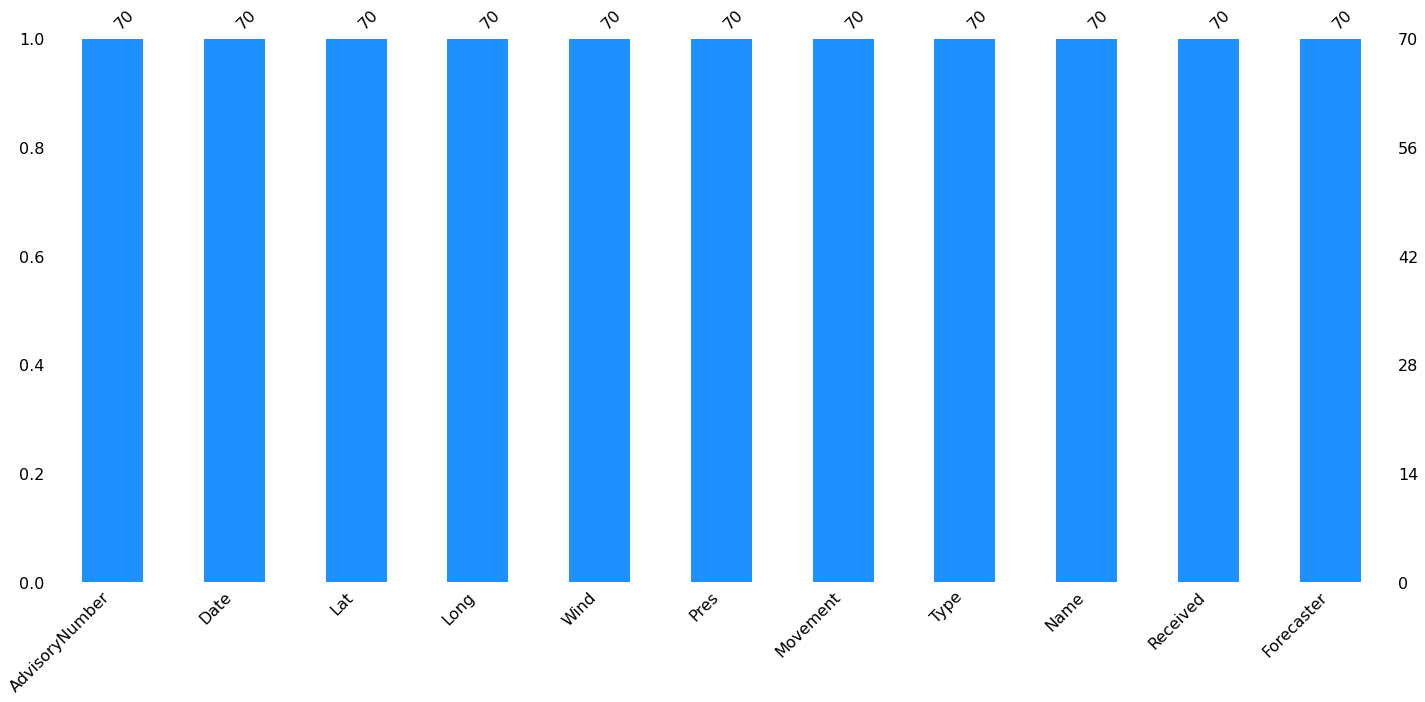

In [11]:
msn.bar(harvey, color='dodgerblue');

In [12]:
harvey.describe()

,Lat,Long,Wind,Pres
count,70.000000,70.000000,70.000000,70.000000
mean,24.181429,88.062857,59.214286,988.685714
std,6.166889,14.094507,29.704288,20.485090
min,12.900000,54.100000,35.000000,938.000000
25%,21.625000,92.500000,40.000000,982.500000
50%,27.350000,94.300000,45.000000,997.000000
75%,28.775000,96.575000,73.750000,1003.750000
max,31.700000,97.700000,130.000000,1007.000000


In [14]:
harvey = harvey.drop(['AdvisoryNumber', 'Forecaster', 'Received'], axis=1)
harvey.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,08/17/2017 14:00,13.1,54.1,35,1007,W at 17 MPH (270 deg),Potential Tropical Cyclone,Nine
1,08/17/2017 17:00,13.0,55.8,40,1004,W at 18 MPH (270 deg),Tropical Storm,Harvey
2,08/17/2017 20:00,12.9,56.5,40,1005,W at 18 MPH (270 deg),Tropical Storm,Harvey
3,08/17/2017 23:00,13.0,57.4,40,1005,W at 18 MPH (270 deg),Tropical Storm,Harvey
4,08/18/2017 02:00,13.0,58.1,40,1005,W at 17 MPH (270 deg),Tropical Storm,Harvey


In [15]:
# Add "-" in front of the number to correctly plot the data:
harvey['Long'] = 0 - harvey['Long']
harvey.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,08/17/2017 14:00,13.1,-54.1,35,1007,W at 17 MPH (270 deg),Potential Tropical Cyclone,Nine
1,08/17/2017 17:00,13.0,-55.8,40,1004,W at 18 MPH (270 deg),Tropical Storm,Harvey
2,08/17/2017 20:00,12.9,-56.5,40,1005,W at 18 MPH (270 deg),Tropical Storm,Harvey
3,08/17/2017 23:00,13.0,-57.4,40,1005,W at 18 MPH (270 deg),Tropical Storm,Harvey
4,08/18/2017 02:00,13.0,-58.1,40,1005,W at 17 MPH (270 deg),Tropical Storm,Harvey


In [16]:
# Combining Lattitude and Longitude to create hurricane coordinates:
harvey['coordinates'] = harvey[['Long', 'Lat']].values.tolist()
harvey.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/17/2017 14:00,13.1,-54.1,35,1007,W at 17 MPH (270 deg),Potential Tropical Cyclone,Nine,"[-54.1, 13.1]"
1,08/17/2017 17:00,13.0,-55.8,40,1004,W at 18 MPH (270 deg),Tropical Storm,Harvey,"[-55.8, 13.0]"
2,08/17/2017 20:00,12.9,-56.5,40,1005,W at 18 MPH (270 deg),Tropical Storm,Harvey,"[-56.5, 12.9]"
3,08/17/2017 23:00,13.0,-57.4,40,1005,W at 18 MPH (270 deg),Tropical Storm,Harvey,"[-57.4, 13.0]"
4,08/18/2017 02:00,13.0,-58.1,40,1005,W at 17 MPH (270 deg),Tropical Storm,Harvey,"[-58.1, 13.0]"


In [17]:
# Change the coordinates to a geoPoint
harvey['coordinates'] = harvey['coordinates'].apply(Point)
harvey.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/17/2017 14:00,13.1,-54.1,35,1007,W at 17 MPH (270 deg),Potential Tropical Cyclone,Nine,POINT (-54.1 13.1)
1,08/17/2017 17:00,13.0,-55.8,40,1004,W at 18 MPH (270 deg),Tropical Storm,Harvey,POINT (-55.8 13)
2,08/17/2017 20:00,12.9,-56.5,40,1005,W at 18 MPH (270 deg),Tropical Storm,Harvey,POINT (-56.5 12.9)
3,08/17/2017 23:00,13.0,-57.4,40,1005,W at 18 MPH (270 deg),Tropical Storm,Harvey,POINT (-57.4 13)
4,08/18/2017 02:00,13.0,-58.1,40,1005,W at 17 MPH (270 deg),Tropical Storm,Harvey,POINT (-58.1 13)


In [18]:
harvey = geopandas.GeoDataFrame(harvey, geometry='coordinates')
harvey.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/17/2017 14:00,13.1,-54.1,35,1007,W at 17 MPH (270 deg),Potential Tropical Cyclone,Nine,POINT (-54.10000 13.10000)
1,08/17/2017 17:00,13.0,-55.8,40,1004,W at 18 MPH (270 deg),Tropical Storm,Harvey,POINT (-55.80000 13.00000)
2,08/17/2017 20:00,12.9,-56.5,40,1005,W at 18 MPH (270 deg),Tropical Storm,Harvey,POINT (-56.50000 12.90000)
3,08/17/2017 23:00,13.0,-57.4,40,1005,W at 18 MPH (270 deg),Tropical Storm,Harvey,POINT (-57.40000 13.00000)
4,08/18/2017 02:00,13.0,-58.1,40,1005,W at 17 MPH (270 deg),Tropical Storm,Harvey,POINT (-58.10000 13.00000)


In [19]:
harvey.groupby('Name').Type.count()

Name
HARVEY     8
Harvey    61
Nine       1
Name: Type, dtype: int64

In [21]:
print("Mean wind speed of Hurricane Harvey was {} mph with {} mph maximum".format(round(harvey.Wind.mean(),4),
                                                                                         harvey.Wind.max()))

Mean wind speed of Hurricane Harvey was 59.2143 mph with 130 mph maximum


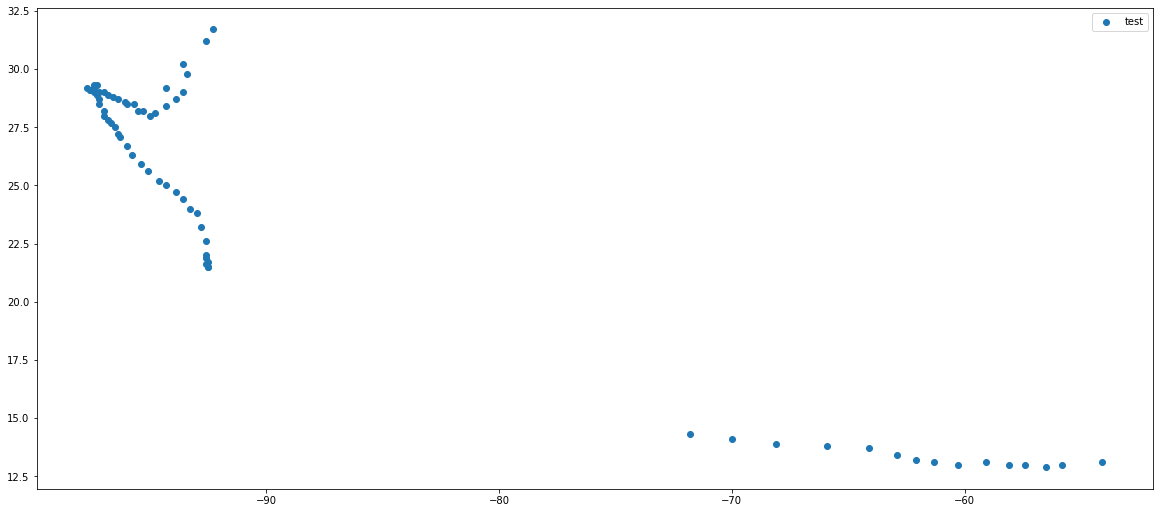

In [49]:
harvey.plot(figsize=(20,10),label='test');
plt.legend()

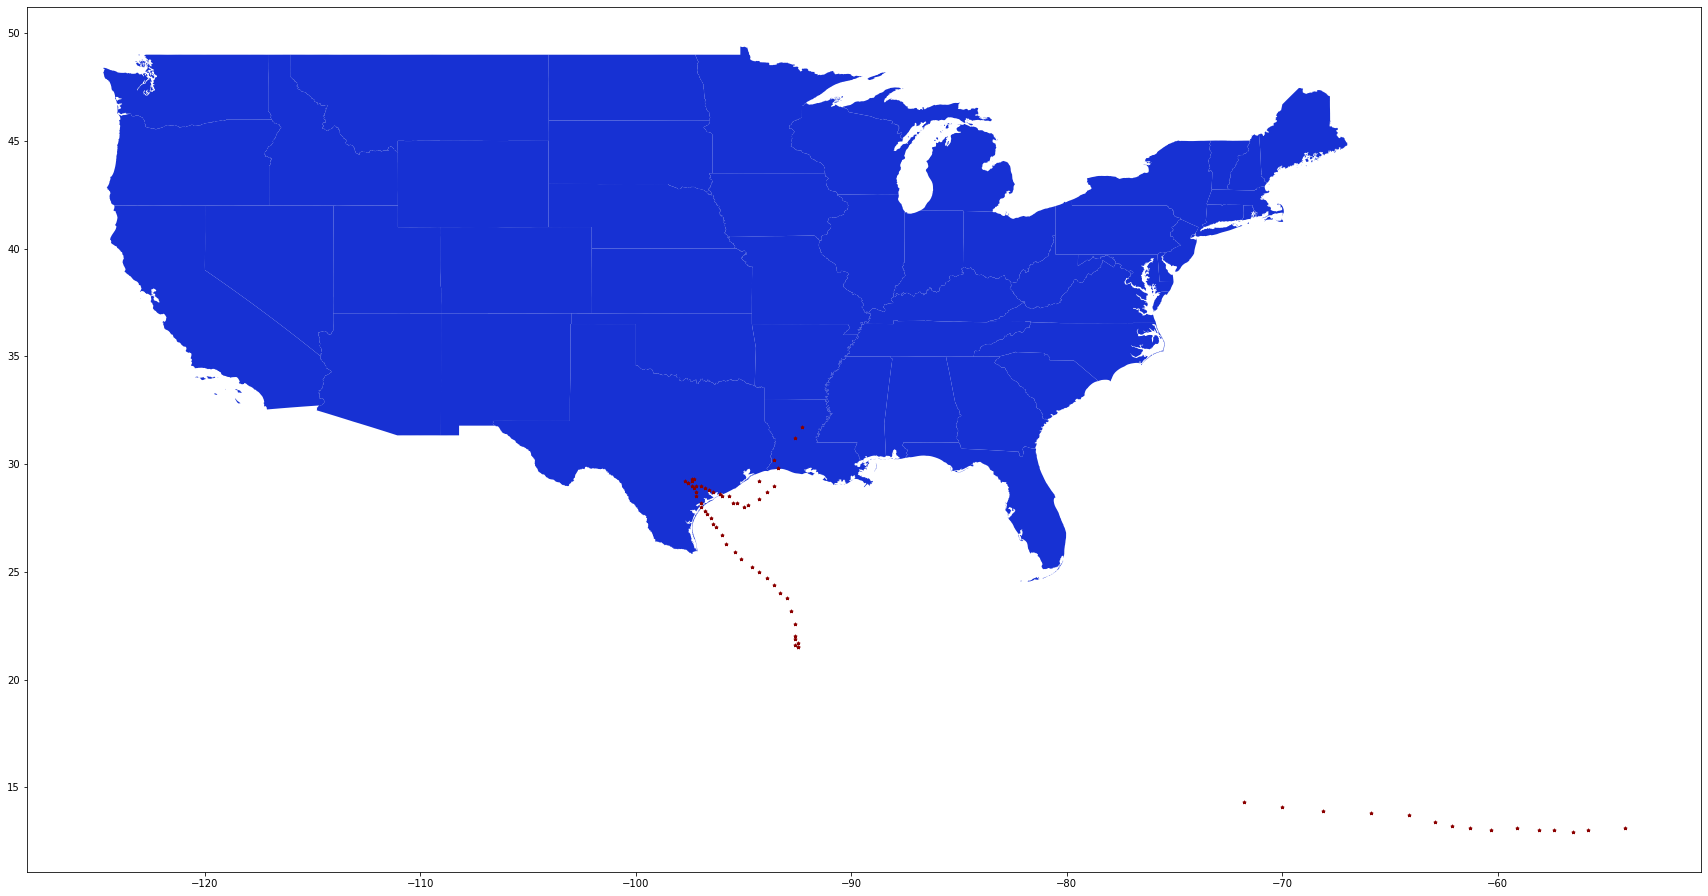

In [25]:
# Plotting to see the hurricane overlay the US map:
fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country['NAME'].isin(['Alaska','Hawaii','Puerto Rico']) == False].plot(ax=ax, color='#1731D3')

# plotting the hurricane position on top with red color to stand out:
harvey.plot(ax=base, color='darkred', marker="*", markersize=10);

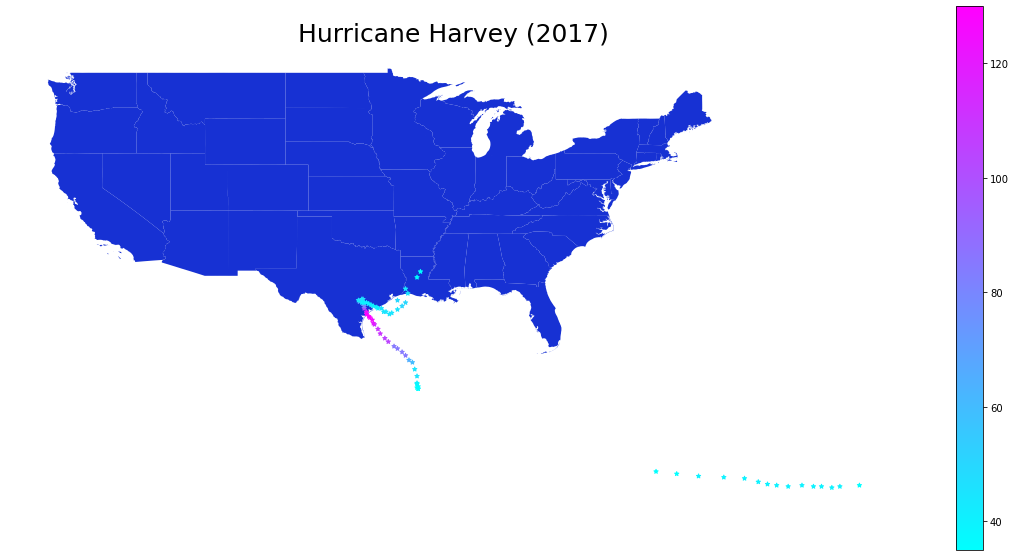

In [74]:
fig, ax = plt.subplots(1, figsize=(20,10))
base = country[country['NAME'].isin(['Alaska','Hawaii','Puerto Rico']) == False].plot(figsize=(60,30),ax=ax, color='#1731D3')
harvey.plot(ax=base, column='Wind', marker="*", markersize=20, cmap='cool', label="Wind speed(mph)",legend=True)
_ = ax.axis('off')
ax.set_title("Hurricane Harvey (2017)", fontsize=25)
plt.savefig('Hurricane_footage.png',bbox_inches='tight');